In [2]:
!pip install opencv-python

In [3]:
# 크기 : 800 * 1000이하
# 얼굴이 있는 사진

In [4]:
# cv2 불러오기
import cv2

# 이미지 불러오기
# cv2.imread('경로') 
cv2.imread('경로') 

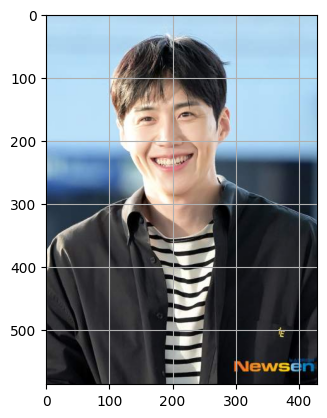

In [24]:
import matplotlib.pyplot as plt
img = cv2.imread('./data/image.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.grid()
plt.imshow(img)

In [6]:
# 이미지에 표현하기
# 사각형 : cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)
# 글씨 쓰기 : cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기)

In [7]:
img = cv2.imread('./data/image.jpg')
img = cv2.rectangle(img, (90,25), (300,300),(0,0,255),3)
img = cv2.putText(img, 'Sunho',(300,300),cv2.FONT_HERSHEY_SIMPLEX,1, (50,100,100),2)
cv2.imshow('rec',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
# 윈도우에 이미지 띄우기 
# cv2.imshow('윈도의 창의 이름', img-실제로 들어가는 이미지)
cv2.imshow('img', img)

# 키보드로부터 키 입력을 기다리는 시간
# 0이면 계속 대기 상태 (코드가 cv2.waitKey(0)에 머무른 상태로 넘어가지 않는다) 
# 1000ms = 1초 : 1초동안 기다렸다가 키 입력 안 되면 넘어가!
# 키를 입력하면 바로 넘어감
cv2.waitKey(0)

#opencv로 열어놓은 윈도우창 닫기
cv2.destroyAllWindows()

In [9]:
#이미지를 흑백사진으로 불러오기
img = cv2.imread('./data/image.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
#불러온 이미지를 흑백사진으로 만들기
img = cv2.imread('./data/image.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('img', img)
cv2.imshow('gray_img', gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#RGB : 빛의 3원색
#Red, Green, Blue : 모일수록 하얗게 됨
# 이미지를 불러올 때는 파란 계열, 초록 계열, 빨간 계열 3가지를 따로 불러옴

In [12]:
img.shape

(586, 430, 3)

In [13]:
# 동영상 : 초당 많은 사진을 연속적으로 보기
# 보통 : 초당 30장의 사진으로 이루어져있음
# 일반인 : 초당 12~15장이면 동영상으로 인식
# 전문가 : 초 당 15~20장이면 동영상으로 인식

In [14]:
### 웹캠으로부터 동영상을 가져오기
import cv2

# 0 : 컴퓨터에 연결된 카메라
# 가지고 있는 동영상 실행시키도 싶으면, 동영상의 경로를 적어주세요!
cap = cv2.VideoCapture(0)
cnt = 0

# 녹화 설정
fps = 30.0 # 녹화할 프레임 수 
width = int(cap.get(3)) # 녹화할 영상의 가로 크기(px)
height = int(cap.get(4)) # 녹화할 영상의 세로 크기(px)


# 코덱 설정
# avi > DIVX
# mp4 > MPEG
fcc = cv2.VideoWriter_fourcc(*'MPEG')

# 동영상 설정
out = cv2.VideoWriter('./data/Video.mp4', fcc, fps, (width,height))

record = False

while True: 
    #연결해놓은 카메라에서 사진 가져오기 
    ret, frame = cap.read() # 한 번 실행할 때마다 한 장씩의 사진을 가져옴
    # ret = 불러오기 성공 - True, 실패하면 - False
	# frame = 불러온 사진 이미지 값
    
    # 이미지 못 불러오면 창 닫기
    if not ret:
        print("비디오 읽기 실패 또는 비디오 모두 읽음")
        cap.release()  # 연결해놓은 카메라/동영상 닫기
        cv2.destroyAllWindows() #윈도우에 열어놓은 창 닫기
        break # 더이상 사진을 불러오지 않아도 되므로 while문 종료
        
    # 이미지를 불러왔을 때
    cv2.imshow('video', frame)
    k = cv2.waitKey(33) # 33ms마다 사진 넘기기 = 1초에 약 30장의 사진을 보여주고 있다.
    
    # 종료버튼 만들기
    # 1(!)누르면 종료하기
    if k == 49 : #1은 아스키코드로 49의 숫자를 가지고 있음
        print('동영상을 종료합니다')
        cap.release() #카메라 닫기
        cv2.destroyAllWindows() #윈도우 창 닫기 
        break # while문 종료 
    # 캡쳐(2)
    if k == 50 :
        cnt += 1
        cv2.imwrite(f'./data/cap{cnt}.png', frame,params = [cv2.IMWRITE_PNG_COMPRESSION, 0])
        
    # 녹화시작 (3)
    if k == 51 :
        record = True
        #out.write(frame) # 3번을 누르는 시점의 사진만 저장되고 있음
        print('녹화시작')
        
    # 3번을 누르고 나서 실행
    if record :
        out.write(frame)
        
    #녹화종료 (4)
    if k == 52:
        out.release()
        print('녹화종료')

동영상을 종료합니다


In [26]:
# OpenCV는 한글 지원 폰트 X
# PIL로 우회하는 방법
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

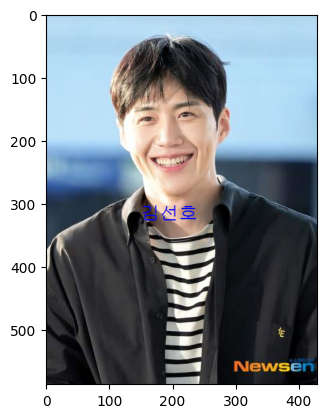

In [36]:
img = cv2.imread('./data/image.jpg')
#cv는 np를 array로 불러옴

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#np -> PIL
img_pil = Image.fromarray(img)
#사용할 폰트와 크기
font = ImageFont.truetype('font/gulim.ttc',30)
#PIL이미지를 그림
draw = ImageDraw.Draw(img_pil)
# 이미지에 텍스트 그리기
draw.text((150,300), '김선호',font = font, fill = (0,0,255,0))

#PIL -> np
img = np.array(img_pil)
plt.imshow(img)
plt.show()

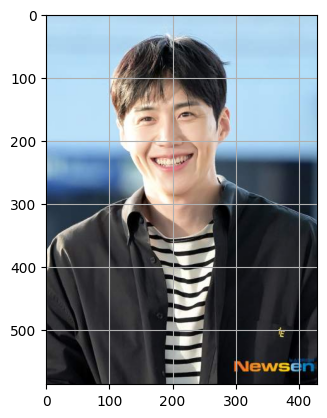

In [25]:
import matplotlib.pyplot as plt
img = cv2.imread('./data/image.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.grid()
plt.imshow(img)